In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler   
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("MatchingGamers_KNN_Finale.csv")

In [3]:
df.head(5)

,Unnamed: 0,Your Age,Your Gender,Your Location,Languages you prefer to speak,Platform to communicate,Top 3 Games (1/3),Top 3 Games (2/3),Top 3 Games (3/3),How long do you play,Your Performance,Your favorite hobby,Second favorite hobby,Third favorite hobby,Fourth favorite hobby,Fifth favorite hobby,Sixth favorite hobby,Seventh favorite hobby,Eight favorite hobby,Least favorite hobby
0,0,19,Female,Baden-Wuerttemberg,German,Other Platforms,Call of Duty (COD),Tekken,FIFA,Less than 10 hours,8,Watching other Series/Movies,Going out with Friends,Travelling,Foodie,Music,Baking/Cooking,Sport,Reading,Watching Animes
1,1,24,Female,Baden-Wuerttemberg,German,Other Platforms,FIFA,Tekken,Other Games,Less than 10 hours,2,Going out with Friends,Watching other Series/Movies,Music,Reading,Baking/Cooking,Foodie,Travelling,Sport,Watching Animes
2,2,19,Prefer not to say,Baden-Wuerttemberg,German,Other Platforms,Tekken,FIFA,Call of Duty (COD),Less than 10 hours,4,Going out with Friends,Foodie,Baking/Cooking,Watching other Series/Movies,Reading,Music,Travelling,Sport,Watching Animes
3,3,29,Female,Baden-Wuerttemberg,German,PS Party,Grand Theft Auto (GTA) Online,Call of Duty (COD),No additional game,Less than 10 hours,2,Foodie,Travelling,Watching other Series/Movies,Sport,Watching Animes,Going out with Friends,Music,Reading,Baking/Cooking
4,4,26,Male,Baden-Wuerttemberg,German,PS Party,FIFA,Call of Duty (COD),Tekken,Less than 10 hours,8,Going out with Friends,Sport,Watching other Series/Movies,Reading,Travelling,Music,Foodie,Baking/Cooking,Watching Animes


## Step 1: Deleting the column "Unnamed:0"

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Preprocessing

## Step 2: Analyzing the values

<AxesSubplot:>

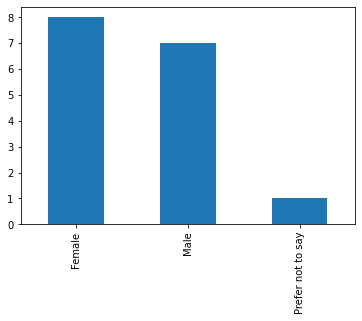

In [5]:
# plot 'your Gender'
df['Your Gender'].value_counts().head(10).plot.bar()

<AxesSubplot:>

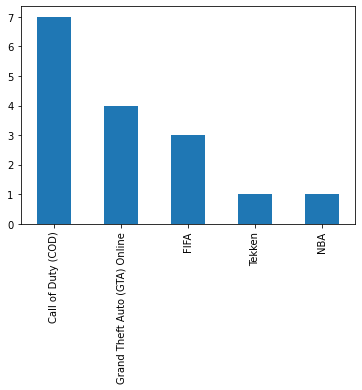

In [6]:
# plot Top 3 Games (1/3) 
df['Top 3 Games (1/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

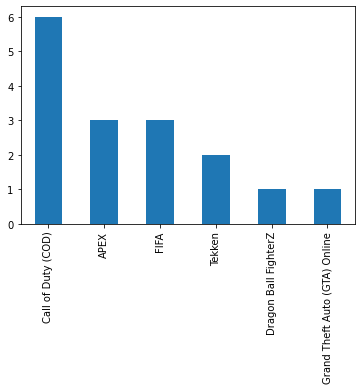

In [7]:
# plot Top 3 Games (2/3) 
df['Top 3 Games (2/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

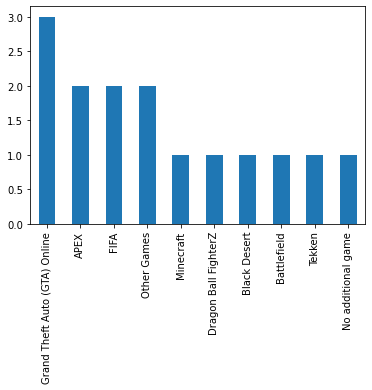

In [8]:
# plot Top 3 Games (3/3)
df['Top 3 Games (3/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

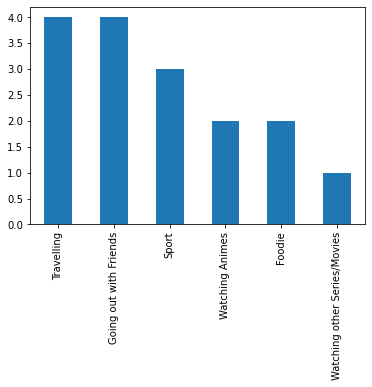

In [9]:
# plot 'Your favorite hobby'
df['Your favorite hobby'].value_counts().head(10).plot.bar()

<AxesSubplot:>

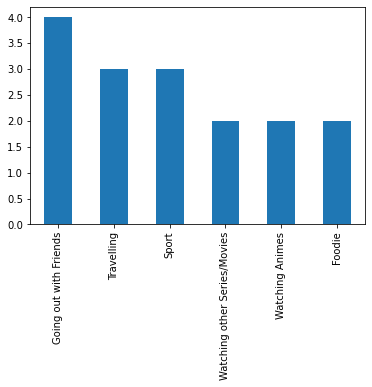

In [10]:
# plot 'Second favorite hobby'
df['Second favorite hobby'].value_counts().head(10).plot.bar()

<AxesSubplot:>

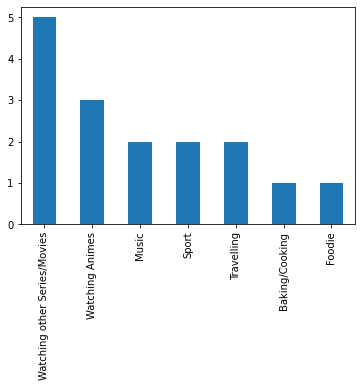

In [11]:
# plot 'Third favorite hobby'
df['Third favorite hobby'].value_counts().head(10).plot.bar()

<AxesSubplot:>

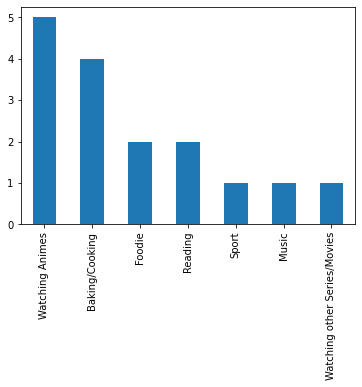

In [12]:
# plot 'Least favorite hobby'
df['Least favorite hobby'].value_counts().head(10).plot.bar()

In [13]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Your Age                       16 non-null     int64 
 1   Your Gender                    16 non-null     object
 2   Your Location                  16 non-null     object
 3   Languages you prefer to speak  16 non-null     object
 4   Platform to communicate        16 non-null     object
 5   Top 3 Games (1/3)              16 non-null     object
 6   Top 3 Games (2/3)              16 non-null     object
 7   Top 3 Games (3/3)              16 non-null     object
 8   How long do you play           16 non-null     object
 9   Your Performance               16 non-null     int64 
 10  Your favorite hobby            16 non-null     object
 11  Second favorite hobby          16 non-null     object
 12  Third favorite hobby           16 non-null     object
 13  Fourth 

In [14]:
# check the mean, minimum and maximum value of every feature
df.describe()

,Your Age,Your Performance
count,16.000000,16.000000
mean,23.875000,6.187500
std,2.986079,2.482438
min,19.000000,2.000000
25%,22.750000,4.750000
50%,24.000000,7.500000
75%,26.000000,8.000000
max,29.000000,10.000000


## Step 3: Converting categorical features into numerical data

To be able to performe the algorithm, the categorical features will be converted into numerical data

In [15]:
# convert features to numeric
categorical_features = ['Your Location','Languages you prefer to speak','Platform to communicate','Top 3 Games (1/3)','Top 3 Games (2/3)','Top 3 Games (3/3)','How long do you play','Your favorite hobby', 'Second favorite hobby', 'Third favorite hobby', 'Fourth favorite hobby', 'Fifth favorite hobby', 'Sixth favorite hobby', 'Seventh favorite hobby', 'Eight favorite hobby', 'Least favorite hobby']
label = ['Your Gender']

In [16]:
# Get unique values in data for every features
def unique_values(columns):
  for column in columns:
    unique_value = df[column].unique().tolist()
    print(column+ " has "+ str(len(unique_value)) +" values" + " : " + str(unique_value))

In [17]:
# convert features into numerical data
def convert_to_int(columns):
  for column in columns:
    unique_values = df[column].unique().tolist()
    dic = {}
    for indx, val in enumerate(unique_values):
      dic[val]=indx
    df[column] = df[column].map(dic).astype(int)
    print(column + " done!")
convert_to_int(label)
unique_values(label)

Your Gender done!
Your Gender has 3 values : [0, 1, 2]


In [18]:
# We use get_dummies function from pandas that Convert categorical variable into dummy/indicator variables.
def convert_to_int_data(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

In [19]:
# We run the function to get data in numeric format
df = convert_to_int_data(df,categorical_features)
df

,Your Age,Your Gender,Your Performance,Your Location_Baden-Wuerttemberg,Languages you prefer to speak_English,Languages you prefer to speak_German,Platform to communicate_Discord,Platform to communicate_Other Platforms,Platform to communicate_PS Party,Top 3 Games (1/3)_Call of Duty (COD),...,Eight favorite hobby_Sport,Eight favorite hobby_Travelling,Eight favorite hobby_Watching other Series/Movies,Least favorite hobby_Baking/Cooking,Least favorite hobby_Foodie,Least favorite hobby_Music,Least favorite hobby_Reading,Least favorite hobby_Sport,Least favorite hobby_Watching Animes,Least favorite hobby_Watching other Series/Movies
0,19,0,8,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,24,0,2,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,19,1,4,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,29,0,2,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,26,2,8,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,28,2,5,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,24,0,5,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7,24,0,8,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,19,2,8,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,25,2,7,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [20]:
# predict Gender
X = df.drop('Your Gender',axis=1)
y = df['Your Gender']

In [21]:
X

,Your Age,Your Performance,Your Location_Baden-Wuerttemberg,Languages you prefer to speak_English,Languages you prefer to speak_German,Platform to communicate_Discord,Platform to communicate_Other Platforms,Platform to communicate_PS Party,Top 3 Games (1/3)_Call of Duty (COD),Top 3 Games (1/3)_FIFA,...,Eight favorite hobby_Sport,Eight favorite hobby_Travelling,Eight favorite hobby_Watching other Series/Movies,Least favorite hobby_Baking/Cooking,Least favorite hobby_Foodie,Least favorite hobby_Music,Least favorite hobby_Reading,Least favorite hobby_Sport,Least favorite hobby_Watching Animes,Least favorite hobby_Watching other Series/Movies
0,19,8,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,24,2,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,19,4,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,29,2,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,26,8,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5,28,5,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,24,5,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,24,8,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,19,8,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9,25,7,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


## Step 4: Using KNN

In [22]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True)

print("Training data is: ")
print(X_train.shape, y_train.shape)
print("Testing data is: ")
print(X_test.shape, y_test.shape)

Training data is: 
(10, 98) (10,)
Testing data is: 
(6, 98) (6,)


In [23]:
# Design and train a KNN classifier.
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# classification accuracies for train and test data.  
for i in range(6):
  i = i+1
  clf = KNeighborsClassifier(n_neighbors=i) 
  clf.fit(X_train, y_train)
  print('Accuracy for the value of k= ' , i , 'is:', clf.score(X_test, y_test))

Accuracy for the value of k=  1 is: 0.16666666666666666
Accuracy for the value of k=  2 is: 0.5
Accuracy for the value of k=  3 is: 0.3333333333333333
Accuracy for the value of k=  4 is: 0.6666666666666666
Accuracy for the value of k=  5 is: 0.5
Accuracy for the value of k=  6 is: 0.6666666666666666


In [25]:
#Apply all the possible tuning techniques to train the best model for the given data. Select the final
#best trained model with your comments for selecting this model

#import required libraries
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error


rmse_val = [] #to store rmse values for different k
for K in range(6):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.8257418583505538
RMSE value for k=  2 is: 1.1547005383792515
RMSE value for k=  3 is: 1.0363754503432017
RMSE value for k=  4 is: 1.0103629710818451
RMSE value for k=  5 is: 1.026320287889377
RMSE value for k=  6 is: 0.9976824997815539


<AxesSubplot:>

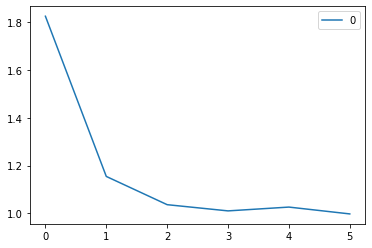

In [26]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [27]:
from sklearn.metrics import classification_report

for i in range(1,7):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.25      0.33      0.29         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           2       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           2       0.33      0.33      0.33         3

    accuracy                           0.33         6
   macro avg       0.33      0.3

## Step 5: Showing Top 3 neighbors

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
nbrs = NearestNeighbors (n_neighbors = 4, algorithm = 'ball_tree').fit(df)

In [30]:
distances, indices = nbrs.kneighbors(df)

In [31]:
indices 

array([[ 0,  8, 11,  2],
       [ 1, 10, 13,  6],
       [ 2,  0,  8, 13],
       [ 3,  5,  1,  6],
       [ 4, 15,  9,  7],
       [ 5,  4,  9,  3],
       [ 6, 13, 14,  7],
       [ 7, 14,  6,  4],
       [ 8,  0, 11,  2],
       [ 9, 14, 15,  4],
       [10,  1, 13,  6],
       [11,  7,  9, 13],
       [12,  4, 15,  7],
       [13,  6,  9, 10],
       [14,  7,  9,  6],
       [15,  4,  9, 14]], dtype=int64)

In [32]:
distances

array([[0.        , 5.65685425, 6.244998  , 6.244998  ],
       [0.        , 5.19615242, 5.65685425, 5.74456265],
       [0.        , 6.244998  , 6.40312424, 6.63324958],
       [0.        , 6.164414  , 7.14142843, 7.34846923],
       [0.        , 4.47213595, 5.09901951, 5.29150262],
       [0.        , 5.56776436, 6.08276253, 6.164414  ],
       [0.        , 5.        , 5.19615242, 5.19615242],
       [0.        , 4.24264069, 5.19615242, 5.29150262],
       [0.        , 5.65685425, 6.08276253, 6.40312424],
       [0.        , 4.47213595, 4.89897949, 5.09901951],
       [0.        , 5.19615242, 5.56776436, 5.65685425],
       [0.        , 5.47722558, 5.83095189, 6.        ],
       [0.        , 5.65685425, 5.83095189, 6.        ],
       [0.        , 5.        , 5.47722558, 5.56776436],
       [0.        , 4.24264069, 4.47213595, 5.19615242],
       [0.        , 4.47213595, 4.89897949, 5.47722558]])